# Introdução
* Carregar imagens e apresentar o histograma.
* Clarear e escurecer as imagens com dois valores de gamma
* Binarizar as imagens originais e transformadas
* Apresentar as imagens com os bits mais e menos significativos
* Apresentar as métricas objetivas

# Carregamento das bibliotecas.

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio

# Funçoes utilitárias 

In [2]:
def read_and_plot(img_path):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    
    fig = plt.figure(figsize=(10,7))
    
    ax = fig.add_subplot(2, 2, 1)
    plt.axis('off')
    plt.imshow(img_rgb)
    ax.set_title(img_path.split(os.path.sep)[-1])
    ax = fig.add_subplot(2,2,2)
    #plt.axis('off')
    plt.xticks(np.arange(0, 17, step=16))
    plt.hist(img_rgb.ravel(), bins=16)
    ax.set_title(f'Histograma de {img_path.split(os.path.sep)[-1]}')
    
    ax = fig.add_subplot(2, 2, 3)
    plt.axis('off')
    plt.imshow(img_gray, cmap='gray')
    ax.set_title(img_path.split(os.path.sep)[-1])
    ax = fig.add_subplot(2, 2, 4)
    #plt.axis('off')
    plt.xticks(np.arange(0, 17, step=16))
    plt.hist(img_gray.ravel(), bins=16)
    ax.set_title(f'Histograma em escala de cinza de {img_path.split(os.path.sep)[-1]}')
    
    return img_rgb, img_gray

In [3]:
def gammaCorrection(src, gamma):
    
    invGamma = 1 / gamma
    table = [((i / 255) ** invGamma) * 255 for i in range(256)]
    table = np.array(table, np.uint8)

    return cv2.LUT(src, table)

In [4]:
def corrigir_gamma_plot(img_path, gamma):
    img = cv2.imread(img_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray_gamma = gammaCorrection(img_gray, gamma)
    img_rgb_gamma = gammaCorrection(img_rgb, gamma)
    
    fig = plt.figure(figsize=(20,7))
    
    ax = fig.add_subplot(2, 3, 1)
    plt.axis('off')
    plt.imshow(img_rgb)
    ax.set_title(img_path.split(os.path.sep)[-1])
    
    ax = fig.add_subplot(2,3,2)
    #plt.axis('off')
    plt.xticks(np.arange(0, 17, step=16))
    plt.imshow(img_rgb_gamma)
    ax.set_title('gamma')
    
    ax = fig.add_subplot(2,3,3)
    plt.xticks(np.arange(0, 17, step=16))
    plt.hist(img_rgb_gamma.ravel(), bins=16)
    ax.set_title(f'Histograma de {img_path.split(os.path.sep)[-1]} com gamma')
    
    ax = fig.add_subplot(2, 3, 4)
    plt.axis('off')
    plt.imshow(img_gray, cmap='gray')
    ax.set_title(img_path.split(os.path.sep)[-1])
    
    ax = fig.add_subplot(2, 3, 5)
    plt.axis('off')
    plt.imshow(img_gray_gamma, cmap='gray')
    ax.set_title(img_path.split(os.path.sep)[-1])
    
    ax = fig.add_subplot(2, 3, 6)
    plt.xticks(np.arange(0, 17, step=16))
    plt.hist(img_gray_gamma.ravel(), bins=16)
    ax.set_title(f'Histograma de {img_path.split(os.path.sep)[-1]} com gamma' )
    
    return img_rgb_gamma, img_gray_gamma
    

## Carregar lista das imagens do dataset

In [5]:
imgs_list = glob.glob('../imgs_pdi/*')

In [6]:
imgs_list

['../imgs_pdi/pelagem.jpg',
 '../imgs_pdi/paisagem.jpg',
 '../imgs_pdi/pedestres02.jpg',
 '../imgs_pdi/pre-historia01.jpeg',
 '../imgs_pdi/leao.jpeg',
 '../imgs_pdi/pre-historia02.jpeg']

## Carregar e exibir a primeira imagem do dataset

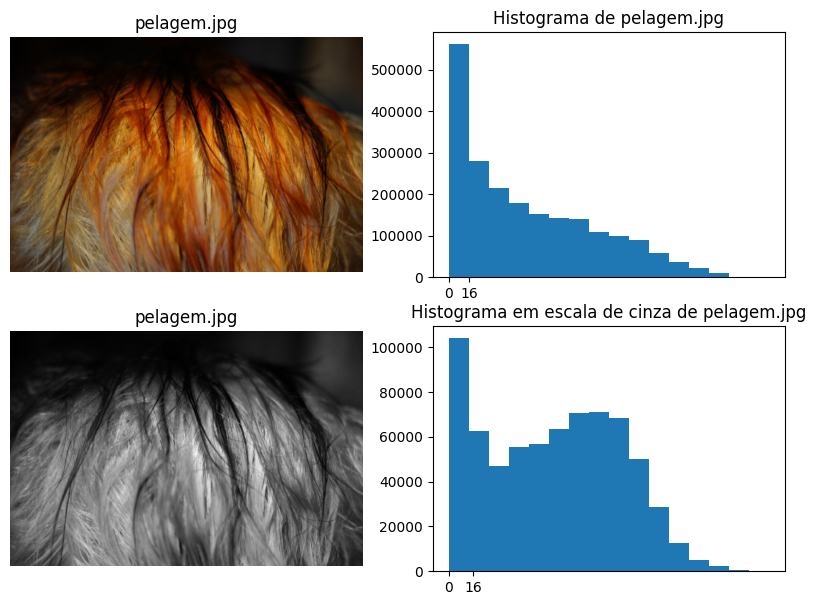

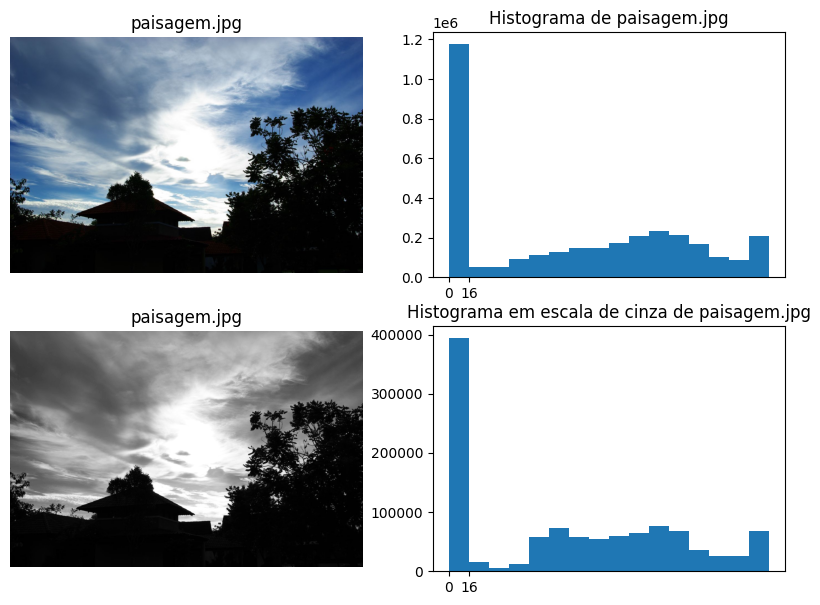

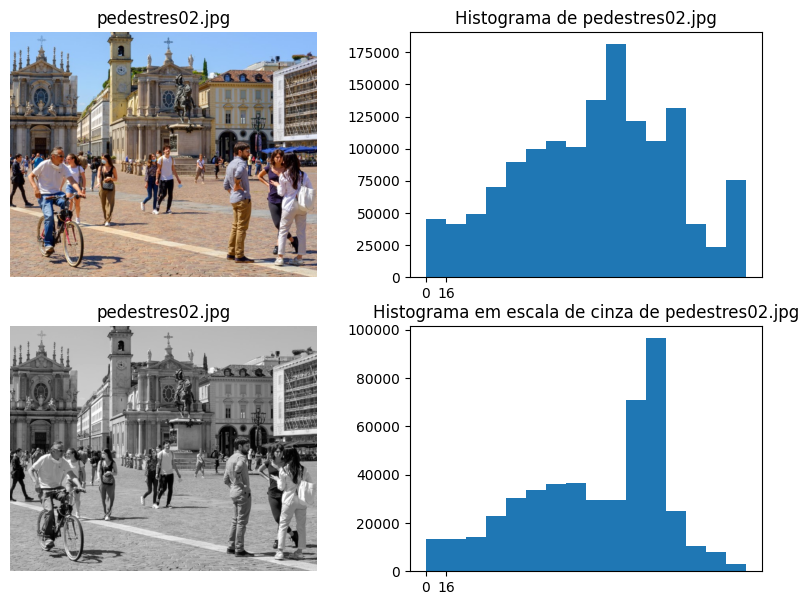

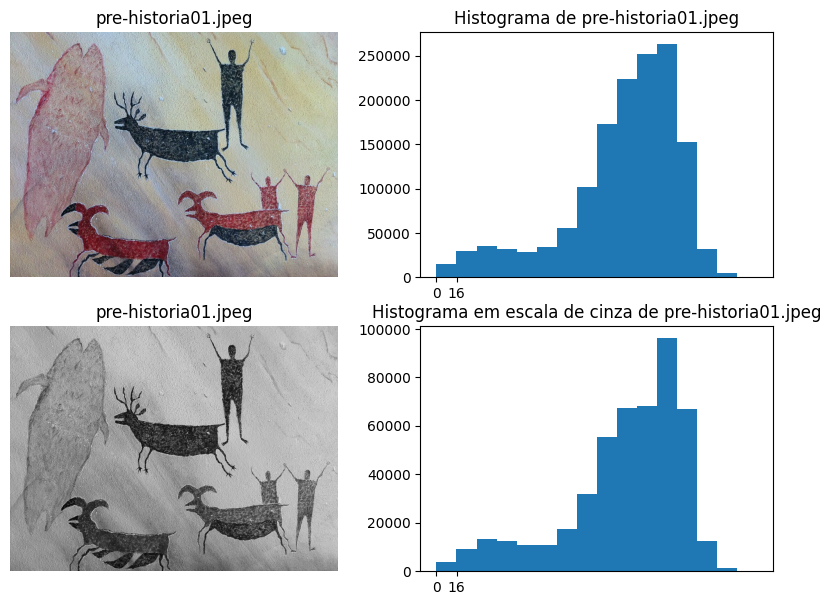

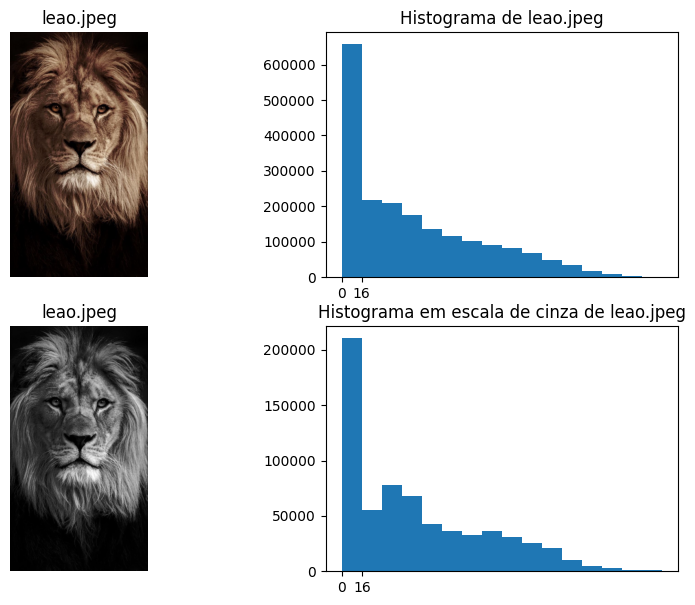

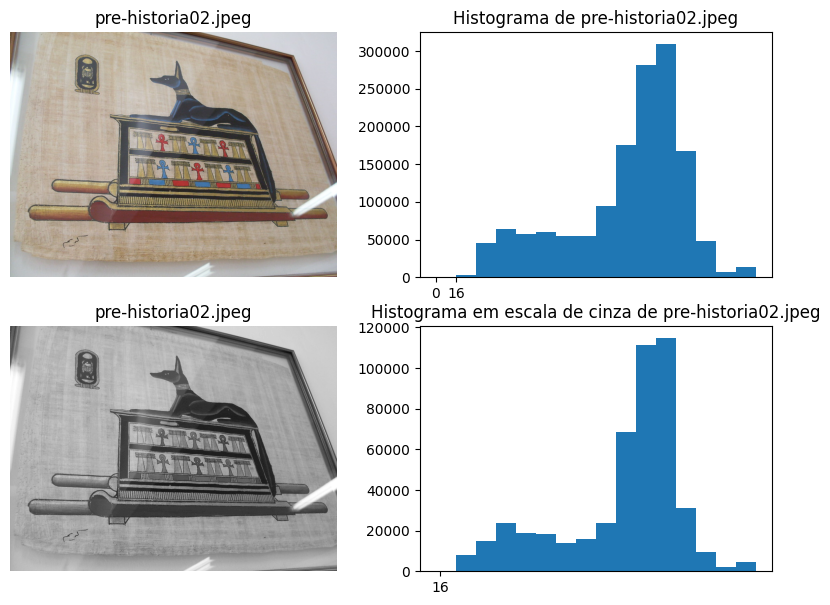

In [7]:
list_img_numpy = []
for imgs in imgs_list:
    list_img_numpy.append(read_and_plot(imgs))

## Conclusões

* aqui

# Correção de Gamma

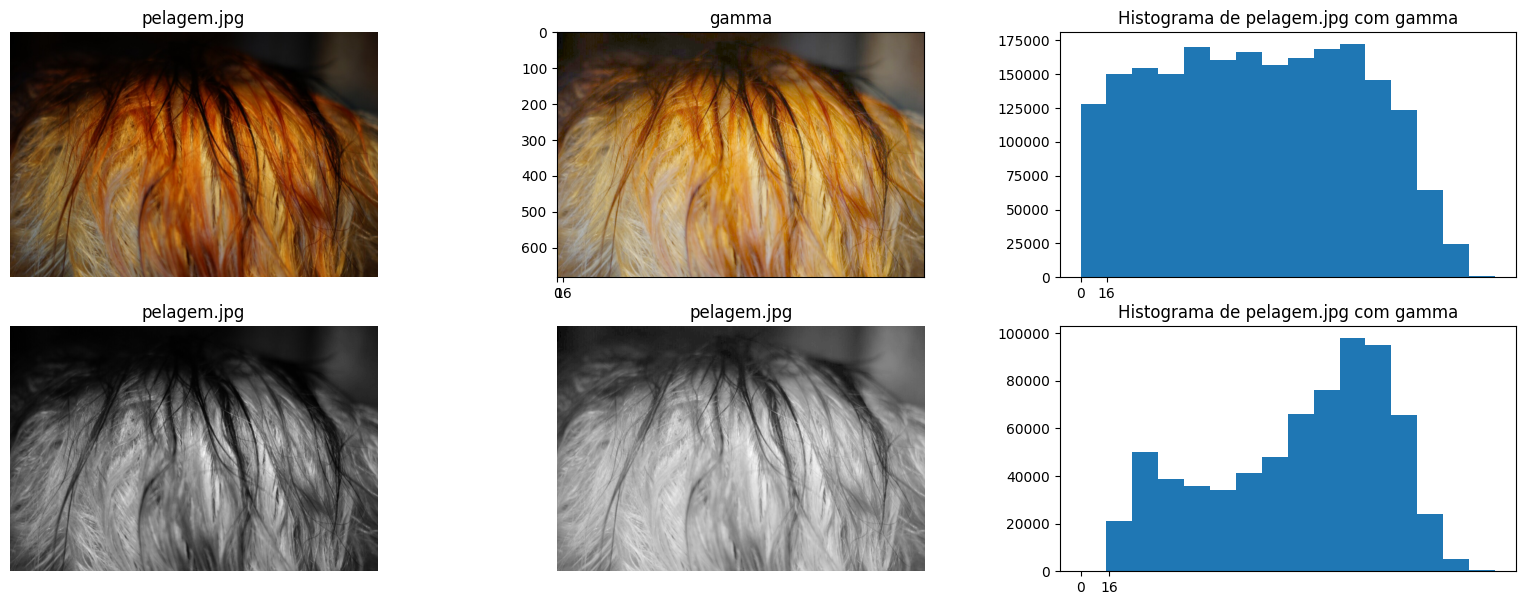

In [8]:
img_gamma, img_gamma_gray = corrigir_gamma_plot(imgs_list[0], 2)

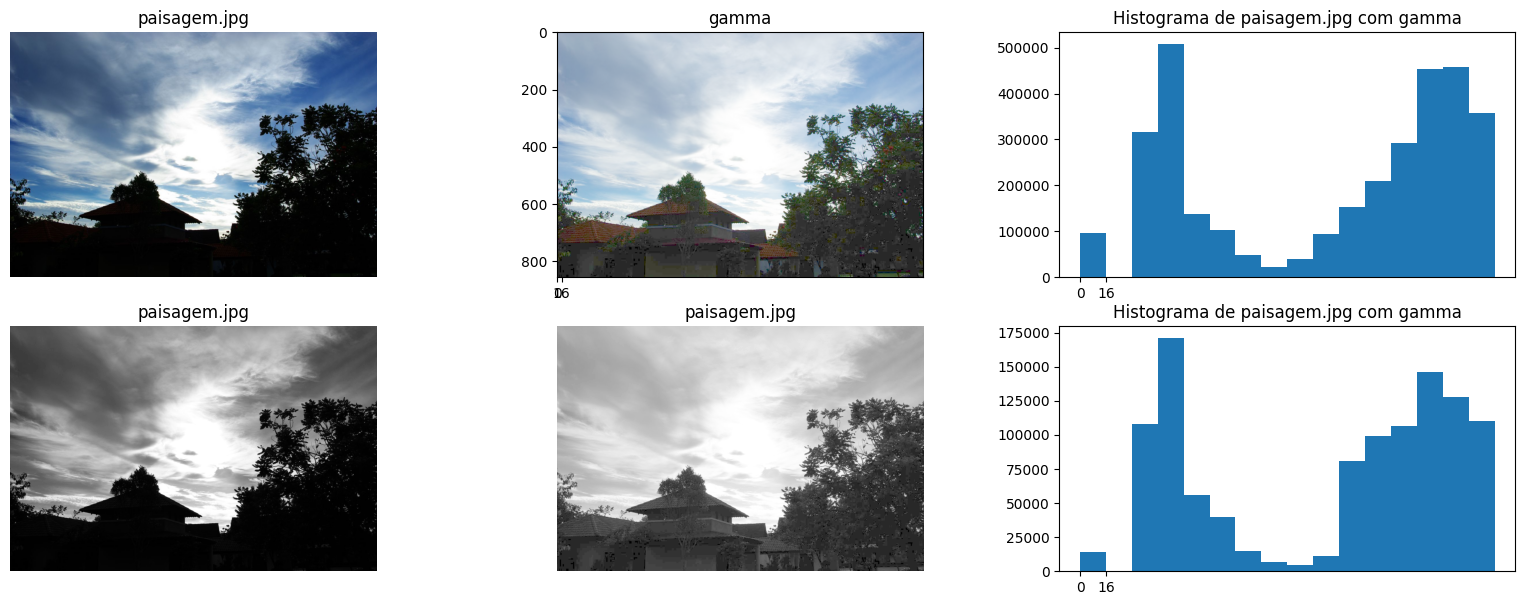

In [9]:
img_gamma, img_gamma_gray = corrigir_gamma_plot(imgs_list[1], 3)

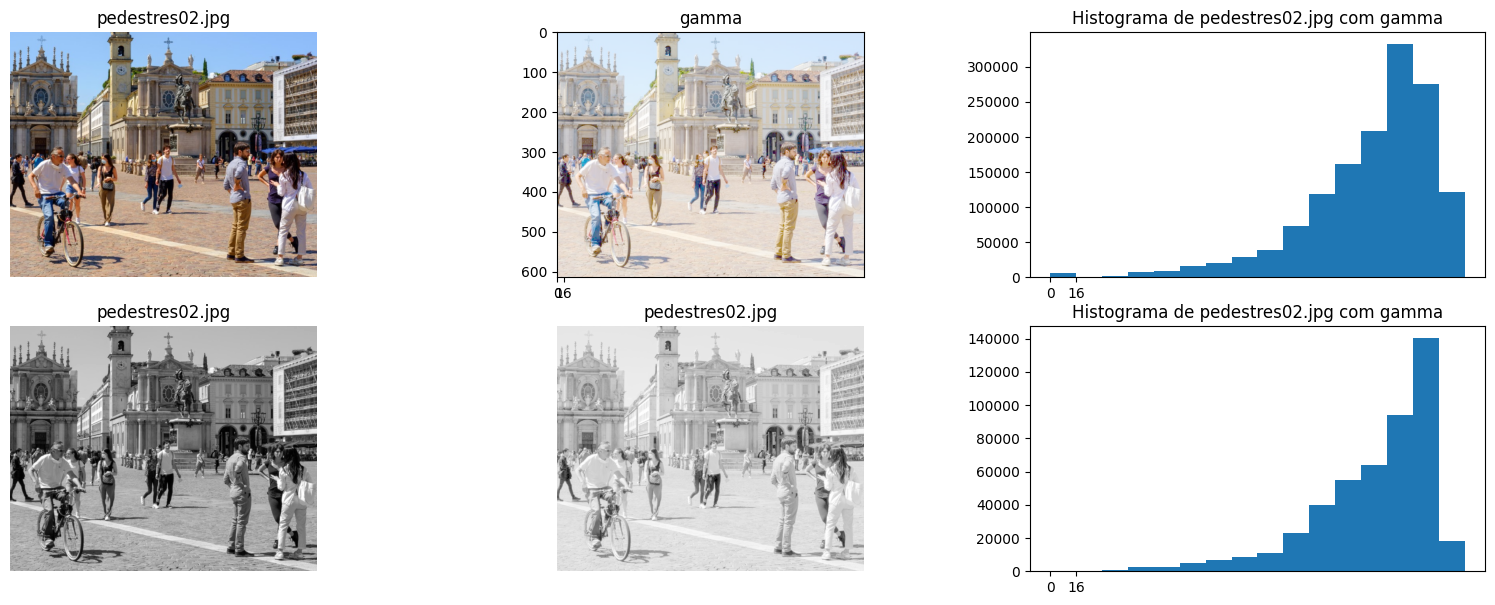

In [10]:
img_gamma, img_gamma_gray = corrigir_gamma_plot(imgs_list[2], 3)

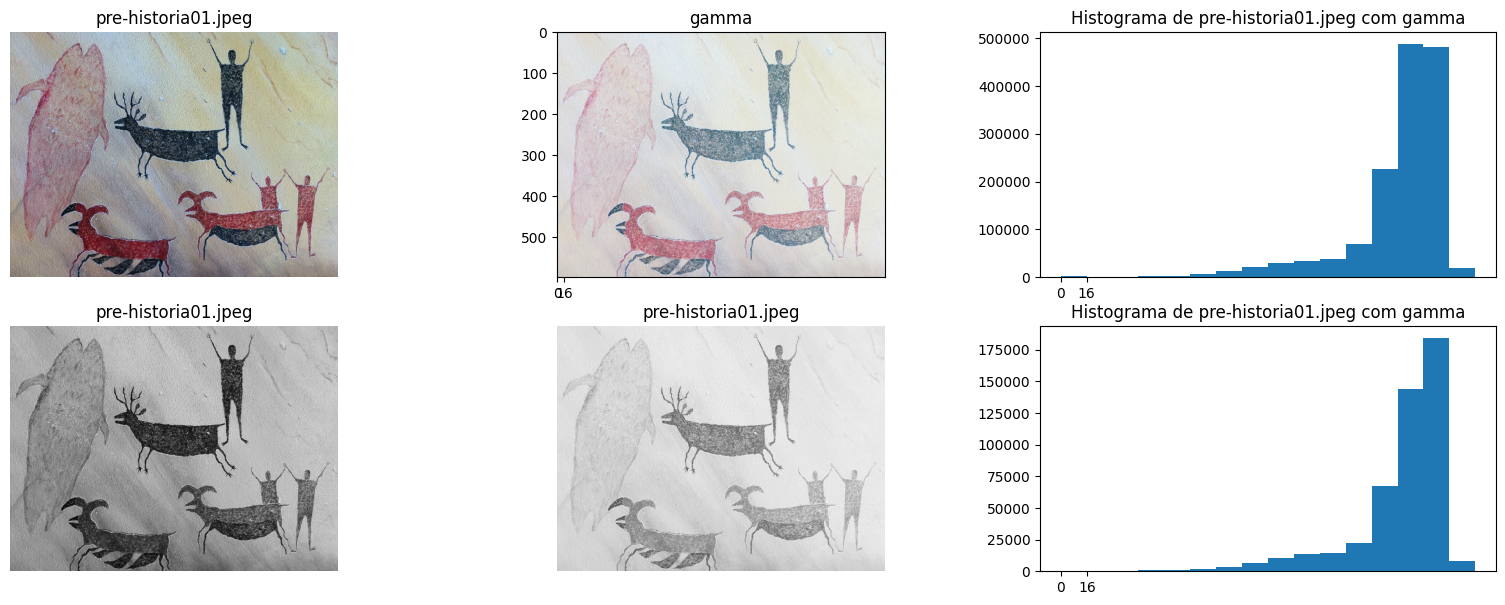

In [11]:
img_gamma, img_gamma_gray = corrigir_gamma_plot(imgs_list[3], 3)

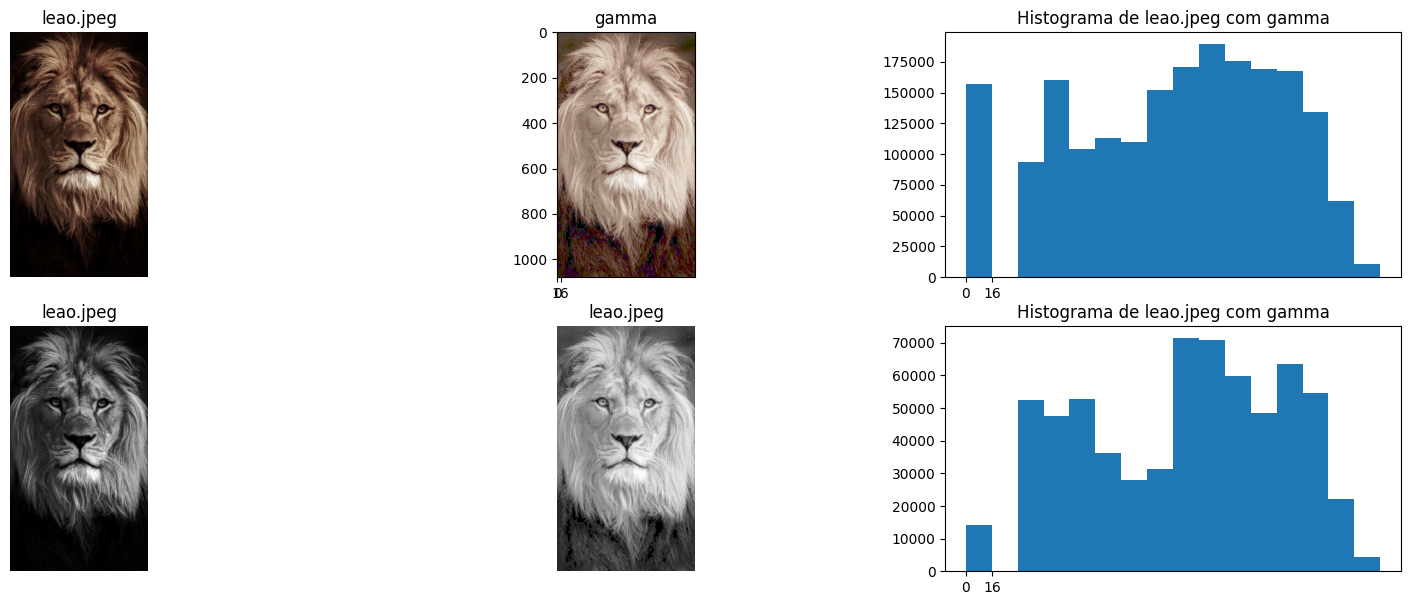

In [12]:
img_gamma, img_gamma_gray = corrigir_gamma_plot(imgs_list[4], 3)

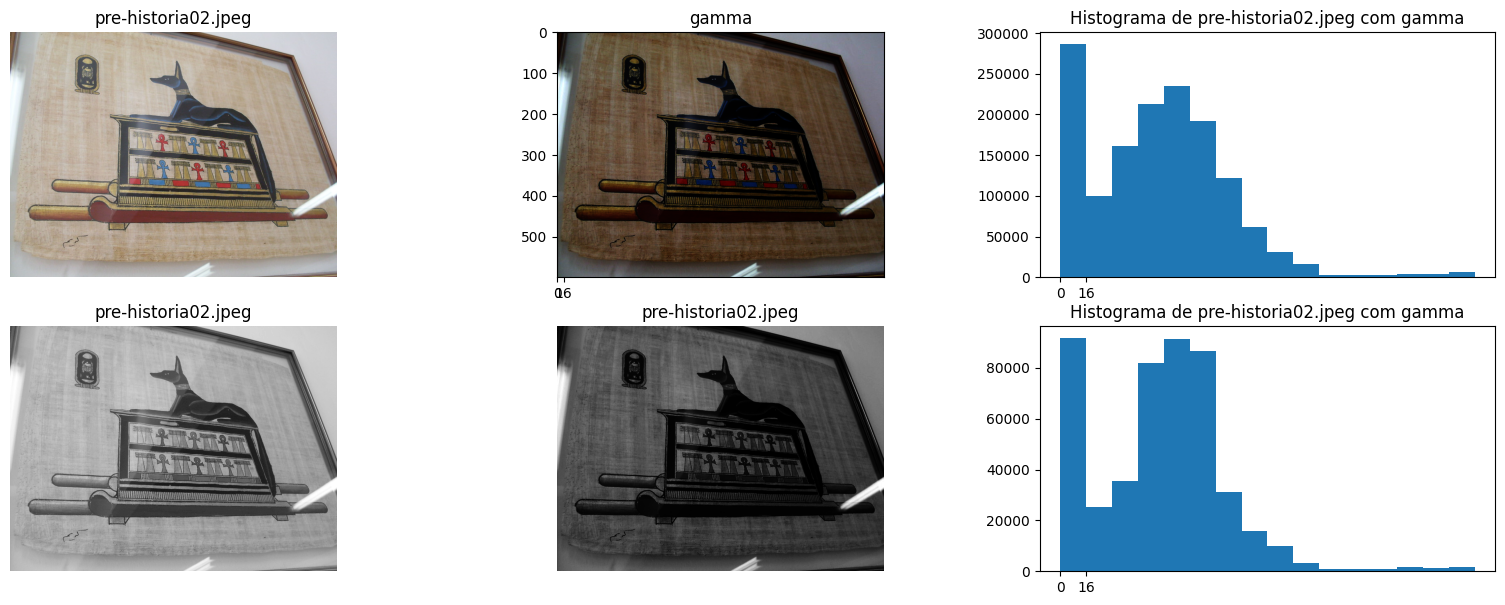

In [13]:
img_gamma, img_gamma_gray = corrigir_gamma_plot(imgs_list[5], 0.3)

## Conclusões

* aqui

# Falta

In [14]:
aa

NameError: name 'aa' is not defined

In [ ]:
gammaImg = gammaCorrection(img, 2)

plt.figure(1)
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(gammaImg,cmap = 'gray')
plt.title('Correção de Gamma'), plt.xticks([]), plt.yticks([])

#Cálculo do Histograma



#plt.figure(plt.figsize(10,10))
plt.figure(2), plt.title("Histograma")
plt.subplot(1,2,1)
histOrig = plt.hist(img.ravel(), bins=255)
#plt.plot(histOrig.ravel(), bits=255, color='r'), plt.title('Histograma da Imagem Original')
plt.subplot(1,2,2)
#plt.plot(histCorrig.ravel(), bits=255, color='b'), plt.title('Histograma após Correção')
histCorrig = plt.hist(gammaImg.ravel(), bins=255)

# Método de OTSU 
indentificamos o valor do limiar de 132, os pixels com valores abaixos de 132 convertidos para 0 e acima para 255, conforme visto no histograma da imagem abaixo.

In [ ]:
plt.imshow(list_img_numpy[0][1])

In [ ]:
limiar , img_bin = cv2.threshold(img,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [ ]:
limiar

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img_bin, cmap='gray')

In [ ]:
cv2_imshow(gammaImg)

Correção do Gamma e Histograma (Segundo valor de Gamma)

In [ ]:
gammaImg = gammaCorrection(img, 0.8)

plt.figure(1)
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(gammaImg,cmap = 'gray')
plt.title('Correção de Gamma'), plt.xticks([]), plt.yticks([])

#Cálculo do Histograma

histOrig = cv2.calcHist([img],[0],None,[256],[0,256])
histCorrig = cv2.calcHist([gammaImg],[0],None,[256],[0,256])

plt.figure(2), plt.title("Histograma")
plt.subplot(1,2,1)
plt.plot(histOrig, color='r'), plt.title('Histograma da Imagem Original')
plt.subplot(1,2,2)
plt.plot(histCorrig, color='b'), plt.title('Histograma após Correção')

In [ ]:
cv2_imshow(gammaImg)

É possível observar, que para valores maiores que 1 a imagem tente a ficar mais clara, obviamente, para valores entre 0 e 1 as imagens tentem a ficar escuras.


Fatiamento em camadas de Bits

In [ ]:
#Converter o valor de cada pixel e guardar numa lista
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits

# Cada bit corresponde a um plano

bit_8 = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
bit_7 = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
bit_6 = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
bit_5 = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
bit_4 = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
bit_3 = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
bit_2 = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
bit_1 = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])



In [ ]:
plt.imshow(bit_8,cmap = 'gray'),plt.title('BIT 8 - MSB')

In [ ]:
plt.imshow(bit_7,cmap = 'gray'),plt.title('BIT 7')

In [ ]:
plt.imshow(bit_6,cmap = 'gray'),plt.title('BIT 6')

In [ ]:
plt.imshow(bit_5,cmap = 'gray'),plt.title('BIT 5')

Com o fatiamento de em camadas é possível observar os níveis de complexidade em cada camada.

O nível de entendimento da imagem por camada vai depender da natureza da imagem. 

Na imagem em questão, a partir do quinto bit a compreensão da imagem fica prejudicada.

In [ ]:
plt.imshow(bit_4,cmap = 'gray'),plt.title('BIT 4')

In [ ]:
plt.imshow(bit_3,cmap = 'gray'),plt.title('BIT 3')

In [ ]:
plt.imshow(bit_2,cmap = 'gray'),plt.title('BIT 2')

In [ ]:
plt.imshow(bit_1,cmap = 'gray'),plt.title('BIT 1 - LSB')

# PSNR SSIM

In [ ]:
def comparar_imgs(split01, split02):
    img = split01
    img_grande = split02
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(img_grande, cmap='gray')
    plt.show()
       
    (score2) = peak_signal_noise_ratio(img, img_grande)
    print('PSNR',score2)
    
    print('')
    (score,a) = structural_similarity(img, img_grande, full=True)
    print("SSIM",score)
    print('------------------------------------------------------------------------------------------------------\n')
    
   

In [ ]:
comparar_imgs(img,bit_8+bit_7+bit_6+bit_5+bit_4+bit_3+bit_2)